In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('EuropeanBrent.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9082 entries, 0 to 9081
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Date                                              9081 non-null   object 
 1   Europe Brent Spot Price FOB (Dollars per Barrel)  9081 non-null   float64
dtypes: float64(1), object(1)
memory usage: 142.0+ KB


In [30]:
df['Date'] = pd.to_datetime(df['Date'])

In [31]:
df

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9077,2023-02-22,79.55
9078,2023-02-23,82.08
9079,2023-02-24,82.31
9080,2023-02-27,82.31


In [32]:
df=df.rename(columns={"Europe Brent Spot Price FOB (Dollars per Barrel)":"Price"})

In [33]:
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9077,2023-02-22,79.55
9078,2023-02-23,82.08
9079,2023-02-24,82.31
9080,2023-02-27,82.31


In [34]:
df.isnull().sum()

Date     1
Price    1
dtype: int64

In [35]:
df=df.dropna()

In [36]:
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9076,2023-02-21,82.14
9077,2023-02-22,79.55
9078,2023-02-23,82.08
9079,2023-02-24,82.31


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9081 entries, 0 to 9080
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9081 non-null   datetime64[ns]
 1   Price   9081 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 212.8 KB


In [38]:
df1 = df[df['Price'] > 0]

In [39]:
df1

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9076,2023-02-21,82.14
9077,2023-02-22,79.55
9078,2023-02-23,82.08
9079,2023-02-24,82.31


In [40]:
df1.describe()

,Price
count,9081.000000
mean,48.688842
std,32.877249
min,9.100000
25%,19.080000
50%,39.600000
75%,70.890000
max,143.950000


In [41]:
df1.corr()

<ipython-input-41-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Price
Price,1.0


In [42]:
dfbox=df1['Date'].dt.year.unique()
print("Unique Years :" ,dfbox)

Unique Years : [1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023]


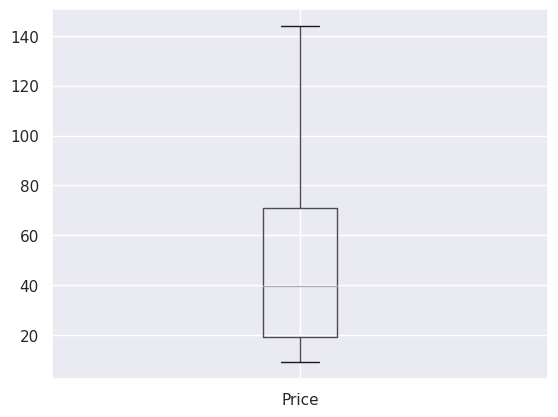

In [43]:
df1.boxplot()
plt.show()

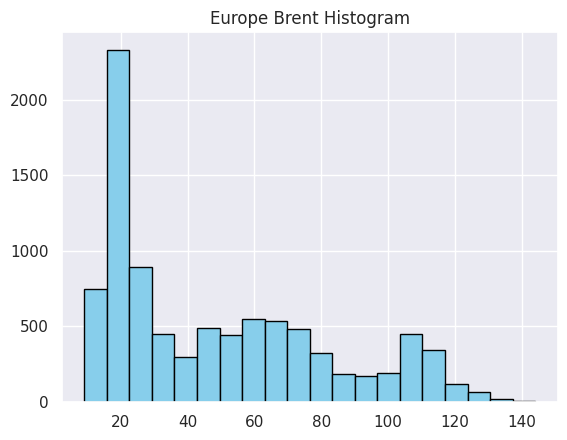

In [44]:

plt.hist(df1['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Europe Brent Histogram')
plt.show()

**Time Series Plots**

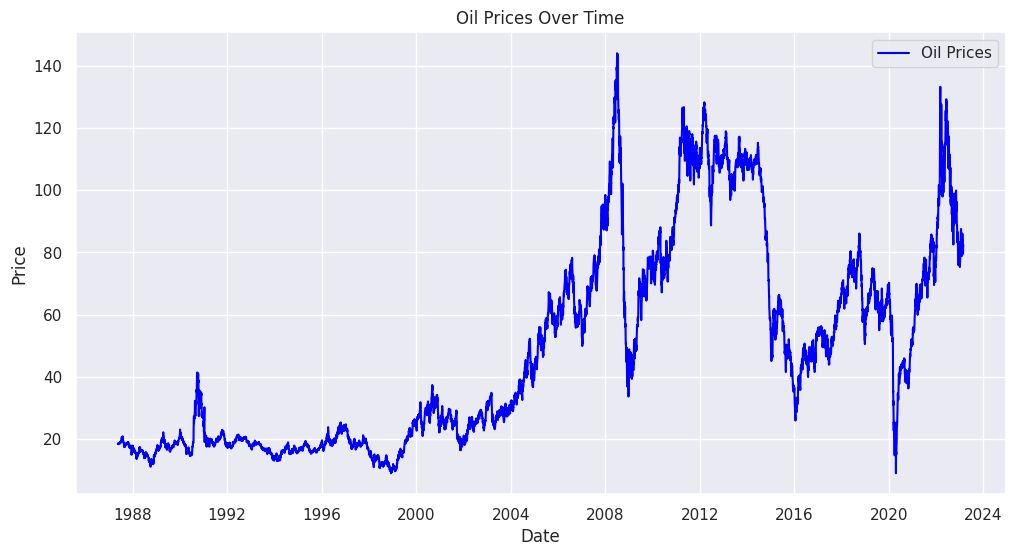

In [45]:
df1['Date'] = pd.to_datetime(df1['Date'])

df1.sort_values(by='Date', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df1['Date'], df1['Price'], label='Oil Prices', color='Blue')
plt.title('Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

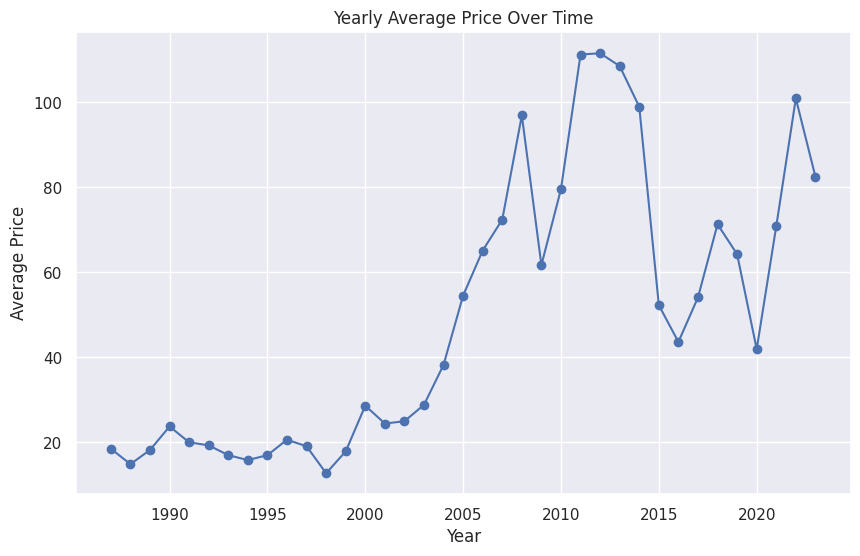

In [46]:

df1['Date'] = pd.to_datetime(df1['Date'])


df1['Year'] = df1['Date'].dt.year


yearly_avg_price = df1.groupby('Year')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_price['Year'], yearly_avg_price['Price'], marker='o')
plt.title('Yearly Average Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


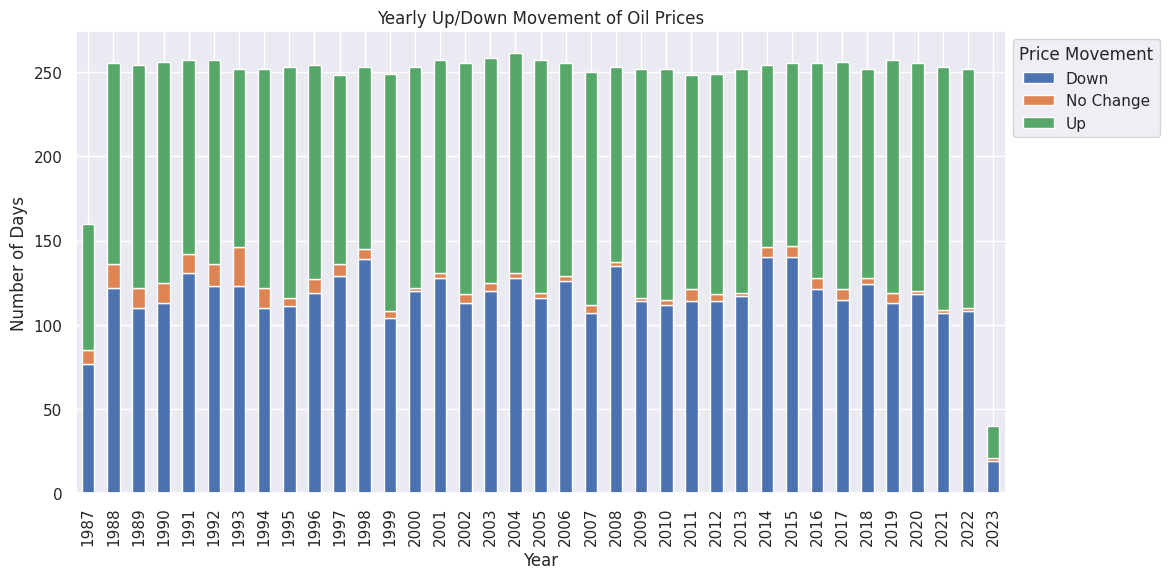

In [47]:

df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year

# Calculate the difference in price for each year
df1['Price_Difference'] = df1.groupby('Year')['Price'].diff()

# Determine whether the price went up or down each year
df1['Direction'] = df1['Price_Difference'].apply(lambda x: 'Up' if x > 0 else 'Down' if x < 0 else 'No Change')

# Count the occurrences of each direction for each year
yearly_price_changes = df1.groupby(['Year', 'Direction']).size().unstack(fill_value=0)

# Plotting
yearly_price_changes.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Yearly Up/Down Movement of Oil Prices')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.legend(title='Price Movement', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


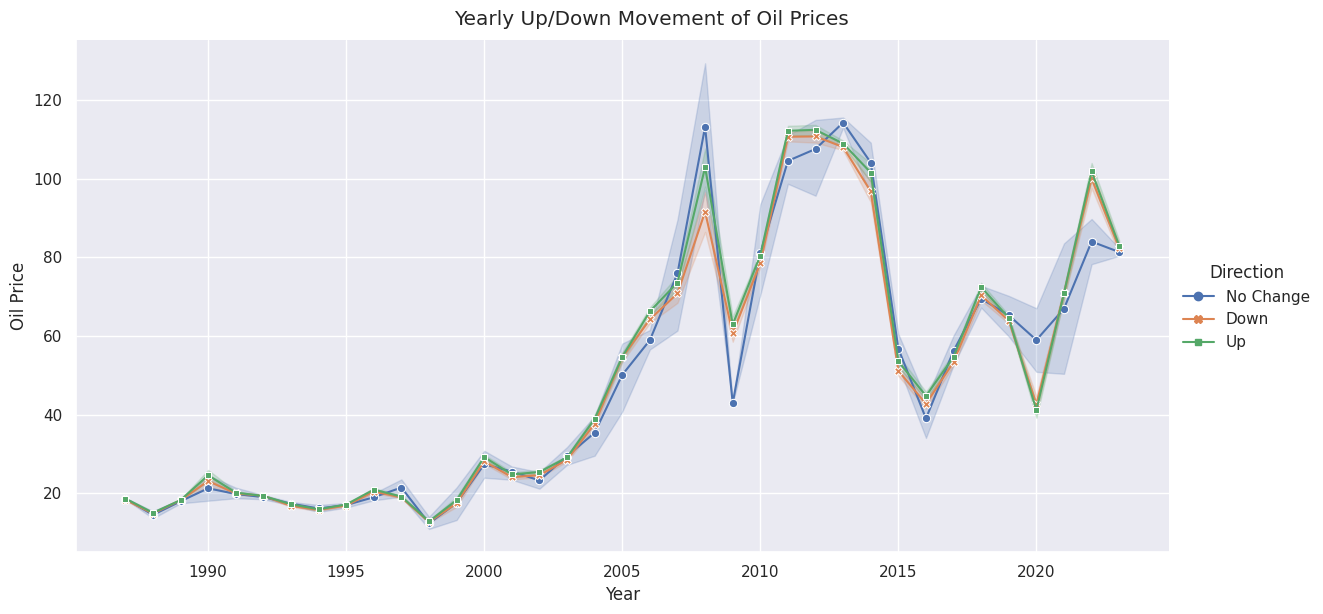

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame
# Make sure the 'Date' column is in datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract year from the 'Date' column
df1['Year'] = df1['Date'].dt.year

# Calculate the difference in price for each year
df1['Price_Difference'] = df1.groupby('Year')['Price'].diff()

# Determine whether the price went up or down each year
df1['Direction'] = df1['Price_Difference'].apply(lambda x: 'Up' if x > 0 else 'Down' if x < 0 else 'No Change')

# Plotting with relplot
sns.set_theme(style="darkgrid")

g = sns.relplot(
    data=df1,
    x="Year", y="Price", hue="Direction",
    kind="line", style="Direction",
    markers=True, dashes=False, height=6, aspect=2
)

# Customize the plot
g.fig.suptitle('Yearly Up/Down Movement of Oil Prices', y=1.02)
g.set_axis_labels('Year', 'Oil Price')

plt.show()


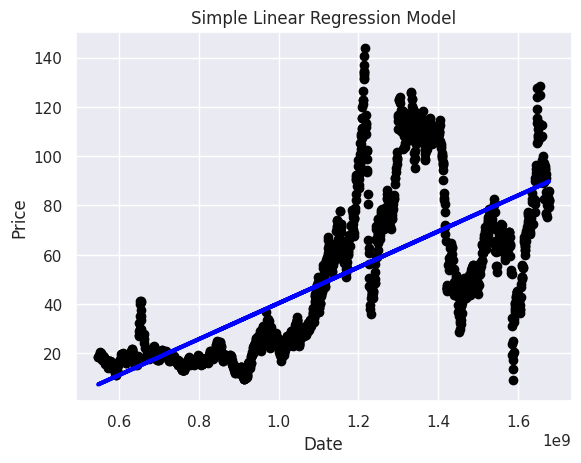

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'Date' is already in a datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Convert datetime to timestamp
df1['Date'] = df1['Date'].astype(int) // 10**9  # converting nanoseconds to seconds

# Extracting independent variable (X) and dependent variable (y)
X = df1[['Date']]
y = df1['Price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Plotting the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Simple Linear Regression Model')
plt.show()


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared value: {r2:.4f}')


Mean Absolute Error: 17.8920
Mean Squared Error: 544.9331
R-squared value: 0.5086
